<a href="https://colab.research.google.com/github/moridin04/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [154]:
df = pd.read_csv('personality.csv')

In [155]:
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Jaime,1,1,1,127,1
1,Xyleene,1,1,1,130,1
2,Manilyn,0,0,0,1592,0
3,Jasmine,0,0,0,59,0
4,Ellison,1,1,1,512,1


In [156]:
df.drop(columns='Name', inplace=True)

In [157]:
df.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,1,1,1,127,1
1,1,1,1,130,1
2,0,0,0,1592,0
3,0,0,0,59,0
4,1,1,1,512,1


1. Display the summary of all the features of the dataset using `.info()`

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       50 non-null     int64
 1   Active in social media?      50 non-null     int64
 2   Replies to comments?         50 non-null     int64
 3   Number of friends/followers  50 non-null     int64
 4   Personality                  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


2. Display the total number of samples from each label using `.value_counts()`

In [159]:
df['Personality'].value_counts()

,count
Personality,
0,28
1,22


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [160]:
x = df.drop(columns=['Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [161]:
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [162]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 4)
(10, 4)
(40,)
(10,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [163]:
knn = KNeighborsClassifier(n_neighbors=13)

7. Train the model using the `.fit()`

In [164]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

8. Test the model using the `.predict()`

In [172]:
y_pred = knn.predict(x_test)

## Evaluate the model

9. Create a confusion matrix

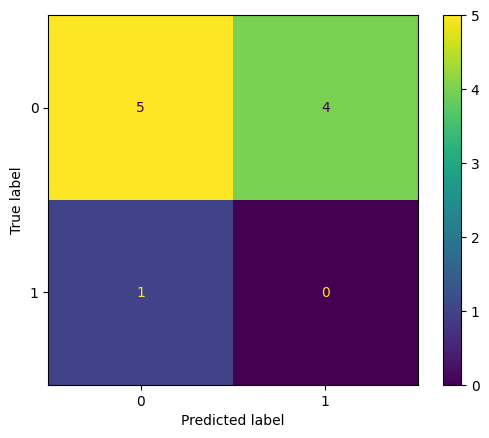

In [166]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [167]:
metrics.accuracy_score(y_test, y_pred)

0.5

11. Display the precision

In [168]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision: ", precision)

Precision:  [0.55555556 0.        ]


12. Display the recall

In [169]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.83333333 0.        ]


13. Display the f1-score

In [170]:
f1 = f1_score(y_test, y_pred, average=None)
print("F1-score:", f1)

F1-score: [0.66666667 0.        ]


In [173]:
knn.predict([[0, 1, 0 ,1000]])

array([0])